## High Performance Gradient Descent for ANN
What you'll learn in today's class
1.  Learn to code AdaGrad, AdaDelta and Adam to train ANN
2.  Generate performance comparisons and develop feel for training

Order of today's Topics
1.  AdaGrad
2.  AdaDelta
3.  Adam
For each of these you'll see
    -algorithm outline
    -program method for simple example
    -in-class programming problem
4.  Performance comparisons

## High Performance Gradient Descent
In the last 5 years several high-performance first order methods have been developed and have made it possible to train deep neural nets that were considered untrainable using ordinary gradient descent.  These share some common features and achieve sufficient improvement over gradient descent that they can be used for training the deep networks that you'll see later in this course.  

#  AdaGrad
-www.magicbroom.info/Papers/DuchiHaSi10.pdf
AdaGrad was developed for doing optimization in feature spaces that are high-dimension but relatively sparse.  In these cases a learning algorithm needs to learn and then tune out the frequently occuring features in order to learn how to make use of the infrequently occuring features.  Here's how AdaGrad accomplishes that.  

The weight update equation for AdaGrad is easiest to describe on a feature-by-feature basis.  Let $w_i(j)$ be the $j^{th}$ element of the $i^{th}$ weight vector and let $\nabla J_i(j)$ be the $j^{th}$ element of the $i^{th}$ gradient vector.  Then the update equation for $w_i$ is:

$w_{i+1}(j) = w_i(j) - \frac{\eta}{\sqrt {\sum\limits_{k=1}^i \nabla J_k(j)^2}} \nabla J_i(j)$

So the $i^{th}$ weight is updated based on the $i^{th}$ component of the gradient vector divided by the root of the sum of the past values of the $i^{th}$ component of the gradient vector.  



#### In coding this equation, we want to accumalate the the square of each $\nabla{J}_i$ value -- oppose to summing the values in a vector. 

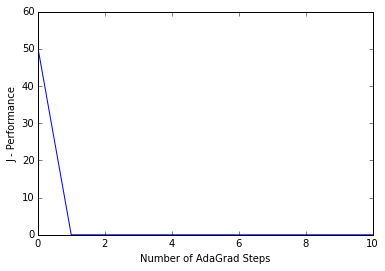

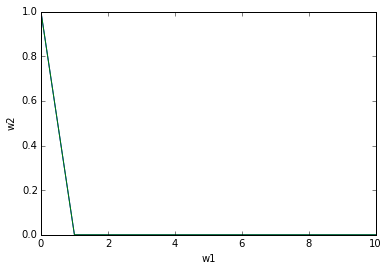

In [2]:
import matplotlib.pyplot as plot
import math
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights
w1 = 1.0
w2 = 1.0

#initialize sum of gradients
g1 = 0.0
g2 = 0.0

#set meta parameters
nSteps = 10
eta = 1.0

#data structures to store results
jList = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)


for i in range(nSteps):
    #update steps
    grad = gradJ(w1, w2, a11, a22)
    g1 += grad[0] * grad[0]
    g2 += grad[1] * grad[1]

    #update weights
    w1 += -eta * grad[0] / math.sqrt(g1)
    w2 += -eta * grad[1] / math.sqrt(g2)

    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)
    
    
plot.plot(range(len(jList)), jList)
plot.xlabel('Number of AdaGrad Steps')
plot.ylabel('J - Performance')
plot.show()


plot.plot(xrange(len(w1List)), w1List);
plot.plot(xrange(len(w1List)), w2List);
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()

In [36]:
import random
import matplotlib.pyplot as plot
import math
from time import time
%matplotlib inline
#synthesize a 2-d classification data set

def run_NN(N,noise, results = False):
    
    start = time()
    X1 = []
    X2 = []
    Y = []
    noiseSd = noise
    numRows = N
    for i in range(numRows):
        #generate attributes x1 and x2 by drawing from uniform (0,1)
        x1 = random.random()
        x2 = random.random()
        y = 0.0
        if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
            y = 1.0
        X1.append(x1); X2.append(x2); Y.append(y);


    def S(x):  #sigmoid function
        return 1.0 / (1.0 + math.exp(-x))

    def numGrad(yN, x1N, x2N, w1N, w2N): #numerical gradient calculation
        delta = 1e-8
        argN = w1N * x1N + w2N * x2N
        argW1 = (w1N + delta) * x1N + w2N * x2N
        argW2 = w1N * x1N + (w2N + delta) * x2N

        grad1 = 0.5 * ((yN - S(argW1))**2 - (yN - S(argN))**2) / delta
        grad2 = 0.5 * ((yN - S(argW2))**2 - (yN - S(argN))**2) / delta
        return [grad1, grad2]

    #Gradient Descent
    nSteps = 100
    stepSize = 20.0
    w1 = random.random()
    w2 = random.random()

    #lists for weight history
    W1 = []
    W1.append(w1)
    W2 = []
    W2.append(w2)

    #list for PI history
    J = []
    M = len(X1)
    
    #initialize sum of gradients
    g1 = 0.0
    g2 = 0.0
    eta = 1.0

    for iStep in range(nSteps):
        #calculate gradient and PI
        gradient1 = 0.0
        gradient2 = 0.0
        jTemp = 0.0

        #numerical version of gradient as a check on math
        gradCheck1 = 0.0
        gradCheck2 = 0.0
        for iData in range(len(X1)):
            arg = w1 * X1[iData] + w2 * X2[iData]
            error = Y[iData] - S(arg)
            jTemp += 0.5 * error**2 / M
            gradient1 += -error * S(arg) * S(-arg) * X1[iData] / M
            gradient2 += -error * S(arg) * S(-arg) * X2[iData] / M

            #calculate numerical version
            numerical = numGrad(Y[iData], X1[iData], X2[iData], w1, w2)
            gradCheck1 += numerical[0] / M
            gradCheck2 += numerical[1] / M

        #Check gradient calculation
        #print(gradient1/gradCheck1, gradient2/gradCheck2)

        #take a gradient step to improve performance
        #step in minus gradient direction since minimizing
        
        #update steps

        g1 += gradient1 **2
        g2 += gradient2 **2

        #update weights
        w1 += -eta * gradient1 / math.sqrt(g1)
        w2 += -eta * gradient2 / math.sqrt(g2)

        W1.append(w1)
        W2.append(w2)
        J.append(jTemp)


    plot.plot(range(len(W1)), W1)
    plot.plot(range(len(W2)), W2)
    plot.xlabel('Number of Gradient Descent Steps')
    plot.ylabel('Network Weights')
    plot.show()

    
    plot.plot(xrange(len(J)), J)
    plot.xlabel('Number of AdaDelta Steps')
    plot.ylabel('J - Performance')
    plot.show()
    
    end = time()
    print "Weight_1   = {:.4}".format(W1[-1])
    print "Weight_2   = {:.4}".format(W2[-1])
    print "Error      = {:.4}".format(J[-1])
    print "Time Elapsed {:.4}".format(end - start)
        

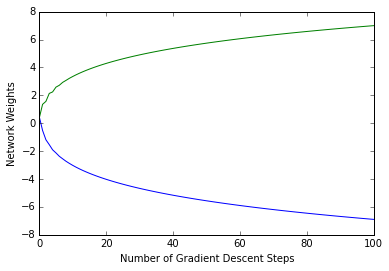

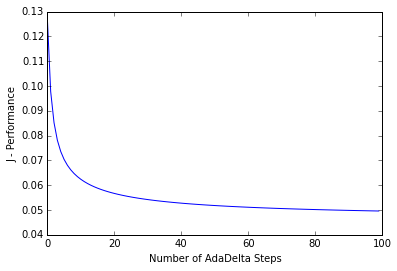

Weight_1   = -6.897
Weight_2   = 6.995
Error      = 0.0496
Time Elapsed 0.463


In [37]:
N = 200
noise = 0.2
run_NN(N, noise)

AdaGrad does a great job on this problem.  It has the same performance as Newton's method.  It nails this simple problem in one step.  See how it does on the simple ANN classifier. 

In class coding exercise
Incorporate AdaGrad into the ANN classifier.  

# AdaDelta
-http://arxiv.org/pdf/1212.5701v1.pdf

AdaDelta's inventors invented it to overcome what they considered limitations of other algorithms.  Other algorithms had tunable parameters that required some are to adjust and AdaGrad in particular diminished the rate of progress in the gradient direction in proportion to the sum of squares of each component of the gradient vectors.  The authors of AdaDelta felt this made AdaGrad lose responsiveness to instances late in the data set.  Here is a description of the AdaDelta algorithm. In this section vector quantities with a superscript 2 mean element-by-element square of the vector.  

Smoothed Squared Gradient: $\bar{g_i^2}$ satisfies

$\bar{g_i^2} = \rho \bar{g_{i-1}^2} + (1 - \rho) \nabla J_i^2$

Smoothed Squared weight steps: $\bar{w_i^2}$ satisfies

$\bar{w_i^2} = \rho \bar{w_{i-1}^2} + (1 - \rho) dw_i^2$

$dw_i = -\frac{\sqrt{\bar{w_{i-1}^2}}}{\sqrt{\bar{g_i^2}}}\nabla J_i$

$w_{i+1} = w_i + dw_i$

Below is the code implementing AdaDelta.  

#### The $\epsilon$ in the $dw_i$ code is there to avoid dividing by zero

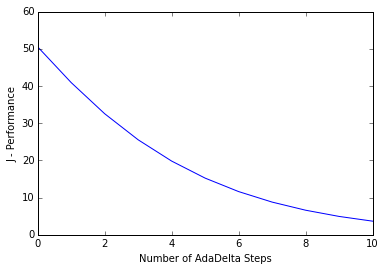

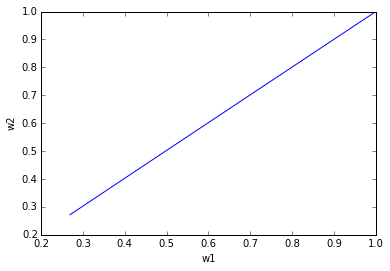

In [38]:
import matplotlib.pyplot as plot
import math
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights
w1 = 1.0
w2 = 1.0

#initialize smoothed squared gradients
smSqg1 = 0.0
smSqg2 = 0.0

#initialize smoothed squared dw's
smSqdw1 = 0.0
smSqdw2 = 0.0

#set meta parameters
nSteps = 10
rho = 0.9
eps = 1e-3

#data structures to store results
jList = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)


for i in range(nSteps):
    #update steps
    grad = gradJ(w1, w2, a11, a22)
    smSqg1 = rho * smSqg1 + (1 - rho) * grad[0] * grad[0]
    smSqg2 = rho * smSqg2 + (1 - rho) * grad[1] * grad[1]

    #weight increments
    dw1 = - math.sqrt(smSqdw1 + eps) * grad[0] / math.sqrt(smSqg1 + eps)
    dw2 = - math.sqrt(smSqdw2 + eps) * grad[1] / math.sqrt(smSqg2 + eps)

    smSqdw1 = rho * smSqdw1 + (1 - rho) * dw1 * dw1
    smSqdw2 = rho * smSqdw2 + (1 - rho) * dw2 * dw2

    w1 += dw1
    w2 += dw2


    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of AdaDelta Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(w1List, w2List)
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()

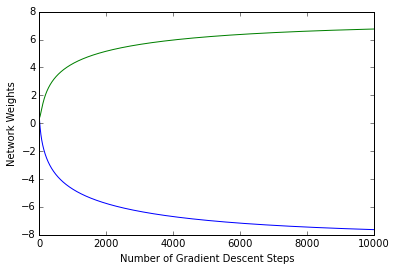

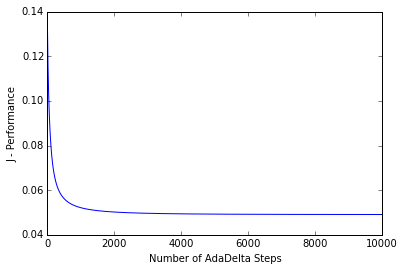

Weight_1   = -7.63
Weight_2   = 6.751
Error      = 0.04909
Time Elapsed 11.35


In [4]:
import random
import matplotlib.pyplot as plot
import math
from time import time
%matplotlib inline
#synthesize a 2-d classification data set



start = time()
X1 = []
X2 = []
Y = []
noiseSd = noise
numRows = N
grad_list = []
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);


def S(x):  #sigmoid function
    return 1.0 / (1.0 + math.exp(-x))

def numGrad(yN, x1N, x2N, w1N, w2N): #numerical gradient calculation
    delta = 1e-8
    argN = w1N * x1N + w2N * x2N
    argW1 = (w1N + delta) * x1N + w2N * x2N
    argW2 = w1N * x1N + (w2N + delta) * x2N

    grad1 = 0.5 * ((yN - S(argW1))**2 - (yN - S(argN))**2) / delta
    grad2 = 0.5 * ((yN - S(argW2))**2 - (yN - S(argN))**2) / delta
    return [grad1, grad2]

w1 = random.random()
w2 = random.random()

#lists for weight history
W1 = []
W1.append(w1)
W2 = []
W2.append(w2)

#list for PI history
J = []
M = len(X1)

#initialize smoothed squared gradients
smSqg1 = 0.0
smSqg2 = 0.0

#initialize smoothed squared dw's
smSqdw1 = 0.0
smSqdw2 = 0.0

#set meta parameters
nSteps = 10000
rho = 0.9
eps = 1e-3


for iStep in range(nSteps):
    #calculate gradient and PI
    gradient1 = 0.0
    gradient2 = 0.0
    jTemp = 0.0

    #numerical version of gradient as a check on math
    gradCheck1 = 0.0
    gradCheck2 = 0.0
    for iData in range(len(X1)):
        arg = w1 * X1[iData] + w2 * X2[iData]
        error = Y[iData] - S(arg)
        jTemp += 0.5 * error**2 / M
        gradient1 += -error * S(arg) * S(-arg) * X1[iData] / M
        gradient2 += -error * S(arg) * S(-arg) * X2[iData] / M

        #calculate numerical version
        numerical = numGrad(Y[iData], X1[iData], X2[iData], w1, w2)
        gradCheck1 += numerical[0] / M
        gradCheck2 += numerical[1] / M

    #Check gradient calculation
    #print(gradient1/gradCheck1, gradient2/gradCheck2)

    #take a gradient step to improve performance
    #step in minus gradient direction since minimizing

    #update steps
    smSqg1 = rho * smSqg1 + (1 - rho) * gradient1**2
    smSqg2 = rho * smSqg2 + (1 - rho) * gradient2**2

    #weight increments
    dw1 = - math.sqrt(smSqdw1 + eps) * gradient1 / math.sqrt(smSqg1 + eps)
    dw2 = - math.sqrt(smSqdw2 + eps) * gradient2 / math.sqrt(smSqg2 + eps)

    smSqdw1 = rho * smSqdw1 + (1 - rho) * dw1 * dw1
    smSqdw2 = rho * smSqdw2 + (1 - rho) * dw2 * dw2

    w1 += dw1
    w2 += dw2

    W1.append(w1)
    W2.append(w2)
    J.append(jTemp)
    grad_list.append([gradient1,gradient2])


plot.plot(range(len(W1)), W1)
plot.plot(range(len(W2)), W2)
plot.xlabel('Number of Gradient Descent Steps')
plot.ylabel('Network Weights')
plot.show()


plot.plot(xrange(len(J)), J)
plot.xlabel('Number of AdaDelta Steps')
plot.ylabel('J - Performance')
plot.show()

end = time()
print "Weight_1   = {:.4}".format(W1[-1])
print "Weight_2   = {:.4}".format(W2[-1])
print "Error      = {:.4}".format(J[-1])
print "Time Elapsed {:.4}".format(end - start)


In [7]:
len(grad_list)

10000

In [8]:
grad_list[9990:-1]

[[7.453159466630176e-05, -6.2516190081276e-05],
 [7.451718919874298e-05, -6.250406742733514e-05],
 [7.450278711980923e-05, -6.249194764020454e-05],
 [7.448838842847186e-05, -6.247983071900538e-05],
 [7.447399312369967e-05, -6.246771666285967e-05],
 [7.445960120446252e-05, -6.245560547089e-05],
 [7.444521266972651e-05, -6.244349714222676e-05],
 [7.443082751846759e-05, -6.243139167598655e-05],
 [7.44164457496566e-05, -6.241928907129449e-05]]

AdaDelta performs similarly to AdaGrad after tweaking the parameters a little.  

In Class Exercise:
Program AdaDelta for the ANN classifier.

# Adam 
-http://arxiv.org/pdf/1412.6980.pdf

The Adam algorithm looks a little more complicated than AdaGrad and AdaDelta.  Adam seems to have more parameters to adjust than either of these others.  After describing the algorithm this section will discuss the parameter settings and you will see that the nature of your problem will help you make good selections without requiring you to do a lot of hunting.  First comes the algorithm summary. 

Adam Algorithm (Algorithm 1 from the paper referenced above with some minor notation changes) 

Parameters required -- Default Values
$$\alpha \in \mathbb{R}^+\qquad \alpha = 0.001$$
$$\beta_1, \beta_2 \in [0, 1)\qquad \beta_1 = 0.9, \beta_2 = 0.999$$
$$\lambda \in [0, 1]\qquad \lambda = 1 - 10^{-8}$$
$$\epsilon small number \qquad \epsilon - 10^{-8}$$

Initialization
w - initial guess for vector of weights
m = 0 - vector of first moments
v = 0 - vector of second moments

Iterate until converged:
$$\beta_1 = \beta_1\lambda$$
$$g = \nabla J$$
$$m = \beta_1 * m + (1 - \beta_1) g$$
$$v = \beta_2 * v + (1 - \beta_2) g^2$$
$$\hat{m} = m / (1 - \beta_1) $$
$$\hat{v} = v / (1 - \beta_2) $$
$$w = w - \alpha \hat{m} / (\sqrt{\hat{v}} + \epsilon)$$

Adam has several parameters, but the main ones that you'll alter are $\alpha, \beta_1, and \beta_2$.  $\alpha$ is a step size which gets modulated by the ration of the two momentum terms.  You can set that to a value that won't make ordinary gradient descent diverge.  \beta_1 and \beta_2 you can set in order to average out randomness in the gradient and the square of the gradient.  Make these closer to one if the data is noisey (or when you're using dropout - as will be covered later).   


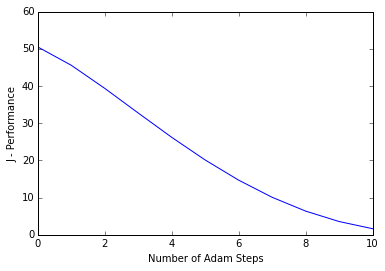

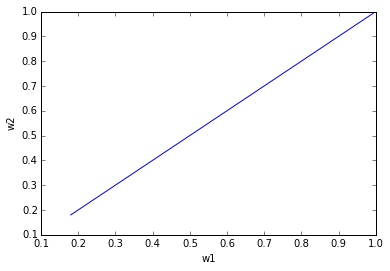

In [3]:
import matplotlib.pyplot as plot
import math
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2

def J(w1, w2, a11, a22):
    return 0.5 * (w1 * w1 * a11 + w2 * w2 * a22)

def gradJ(w1, w2, a11, a22):
    return [w1 * a11, w2 * a22]


#pick problem parameters
a11 = 100.0
a22 = 1.0

#initialize weights
w1 = 1.0
w2 = 1.0

#learning parameters
alpha = 0.05
beta1 = 0.9
beta2 = 0.999
eps = 1e-6
lamb = 1 - 1e-4

#initialize
m1 = 0.0
m2 = 0.0

v1 = 0.0
v2 = 0.0

#set meta parameters
nSteps = 10

#data structures to store results
jList = []
w1List = []
w2List = []

jList.append(J(w1, w2, a11, a22))
w1List.append(w1)
w2List.append(w2)


for i in range(nSteps):
    #update steps
    beta1 = beta1 * lamb
    grad = gradJ(w1, w2, a11, a22)

    #compute 1st and second moments
    m1 = beta1 * m1 + (1 - beta1) * grad[0]
    m2 = beta1 * m2 + (1 - beta1) * grad[1]

    v1 = beta2 * v1 + (1 - beta2) * grad[0] * grad[0]
    v2 = beta2 * v2 + (1 - beta2) * grad[1] * grad[1]

    #bias corrections
    m1hat = m1 / (1 - beta1)
    m2hat = m2 / (1 - beta1)

    v1hat = v1 / (1 - beta2)
    v2hat = v2 / (1 - beta2)

    #weight updates
    w1 = w1 - alpha * m1hat / (math.sqrt(v1hat) + eps)
    w2 = w2 - alpha * m2hat / (math.sqrt(v2hat) + eps)

    #store new values for plotting
    jList.append(J(w1, w2, a11, a22))
    w1List.append(w1)
    w2List.append(w2)

plot.plot(range(len(jList)), jList)
plot.xlabel('Number of Adam Steps')
plot.ylabel('J - Performance')
plot.show()

plot.plot(w1List, w2List)
plot.xlabel('w1')
plot.ylabel('w2')
plot.show()

Parameters required -- Default Values
$$\alpha \in \mathbb{R}^+\qquad \alpha = 0.001$$
$$\beta_1, \beta_2 \in [0, 1)\qquad \beta_1 = 0.9, \beta_2 = 0.999$$
$$\lambda \in [0, 1]\qquad \lambda = 1 - 10^{-8}$$
$$\epsilon small number \qquad \epsilon - 10^{-8}$$

Initialization
w - initial guess for vector of weights
m = 0 - vector of first moments
v = 0 - vector of second moments

Iterate until converged:
$$\beta_1 = \beta_1\lambda$$
$$g = \nabla J$$
$$m = \beta_1 * m + (1 - \beta_1) g$$
$$v = \beta_2 * v + (1 - \beta_2) g^2$$
$$\hat{m} = m / (1 - \beta_1) $$
$$\hat{v} = v / (1 - \beta_2) $$
$$w = w - \alpha \hat{m} / (\sqrt{\hat{v}} + \epsilon)$$

In [10]:
import random
import matplotlib.pyplot as plot
import math
from time import time
%matplotlib inline
#synthesize a 2-d classification data set

def run_NN(N,noise, results = False):
    
    start = time()
    X1 = []
    X2 = []
    Y = []
    noiseSd = noise
    numRows = N
    for i in range(numRows):
        #generate attributes x1 and x2 by drawing from uniform (0,1)
        x1 = random.random()
        x2 = random.random()
        y = 0.0
        if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
            y = 1.0
        X1.append(x1); X2.append(x2); Y.append(y);


    def S(x):  #sigmoid function
        return 1.0 / (1.0 + math.exp(-x))

    def numGrad(yN, x1N, x2N, w1N, w2N): #numerical gradient calculation
        delta = 1e-8
        argN = w1N * x1N + w2N * x2N
        argW1 = (w1N + delta) * x1N + w2N * x2N
        argW2 = w1N * x1N + (w2N + delta) * x2N

        grad1 = 0.5 * ((yN - S(argW1))**2 - (yN - S(argN))**2) / delta
        grad2 = 0.5 * ((yN - S(argW2))**2 - (yN - S(argN))**2) / delta
        return [grad1, grad2]

    w1 = random.random()
    w2 = random.random()

    #lists for weight history
    W1 = []
    W1.append(w1)
    W2 = []
    W2.append(w2)

    #list for PI history
    J = []
    M = len(X1)
    
    #initialize weights
    w1 = 1.0
    w2 = 1.0

    #learning parameters
    alpha = 0.05
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-6
    lamb = 1 - 1e-4

    #initialize
    m1 = 0.0
    m2 = 0.0

    v1 = 0.0
    v2 = 0.0
    
    nSteps = 20000


    for iStep in range(nSteps):
        #calculate gradient and PI
        gradient1 = 0.0
        gradient2 = 0.0
        jTemp = 0.0

        #numerical version of gradient as a check on math
        gradCheck1 = 0.0
        gradCheck2 = 0.0
        for iData in range(len(X1)):
            arg = w1 * X1[iData] + w2 * X2[iData]
            error = Y[iData] - S(arg)
            jTemp += 0.5 * error**2 / M
            gradient1 += -error * S(arg) * S(-arg) * X1[iData] / M
            gradient2 += -error * S(arg) * S(-arg) * X2[iData] / M

            #calculate numerical version
            numerical = numGrad(Y[iData], X1[iData], X2[iData], w1, w2)
            gradCheck1 += numerical[0] / M
            gradCheck2 += numerical[1] / M

        #Check gradient calculation
        #print(gradient1/gradCheck1, gradient2/gradCheck2)

        #take a gradient step to improve performance
        #step in minus gradient direction since minimizing
        
        #update steps
        beta1 = beta1 * lamb

        #compute 1st and second moments
        m1 = beta1 * m1 + (1 - beta1) * gradient1
        m2 = beta1 * m2 + (1 - beta1) * gradient2

        v1 = beta2 * v1 + (1 - beta2) * gradient1**2
        v2 = beta2 * v2 + (1 - beta2) * gradient2**2

        #bias corrections
        m1hat = m1 / (1 - beta1)
        m2hat = m2 / (1 - beta1)

        v1hat = v1 / (1 - beta2)
        v2hat = v2 / (1 - beta2)

        #weight updates
        w1 = w1 - alpha * m1hat / (math.sqrt(v1hat) + eps)
        w2 = w2 - alpha * m2hat / (math.sqrt(v2hat) + eps)


        W1.append(w1)
        W2.append(w2)
        J.append(jTemp)


    plot.plot(range(len(W1)), W1)
    plot.plot(range(len(W2)), W2)
    plot.xlabel('Number of Gradient Descent Steps')
    plot.ylabel('Network Weights')
    plot.show()

    
    plot.plot(xrange(len(J)), J)
    plot.xlabel('Number of AdaDelta Steps')
    plot.ylabel('J - Performance')
    plot.show()
    
    end = time()
    print "Weight_1   = {:.4}".format(W1[-1])
    print "Weight_2   = {:.4}".format(W2[-1])
    print "Error      = {:.4}".format(J[-1])
    print "Time Elapsed {:.4}".format(end - start)
        

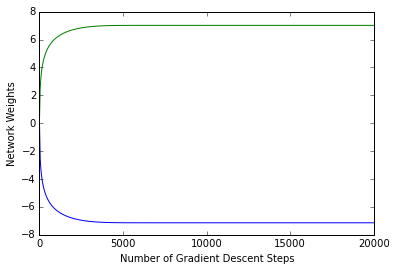

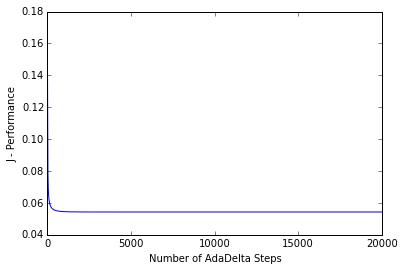

Weight_1   = -7.139
Weight_2   = 7.013
Error      = 0.0543
Time Elapsed 19.9


In [11]:
N = 200
noise = 0.2
run_NN(N,noise)